### Manually setting weights with varience of 1/n, where n is number of neurons in previous layer.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/ushape.csv")

In [ ]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

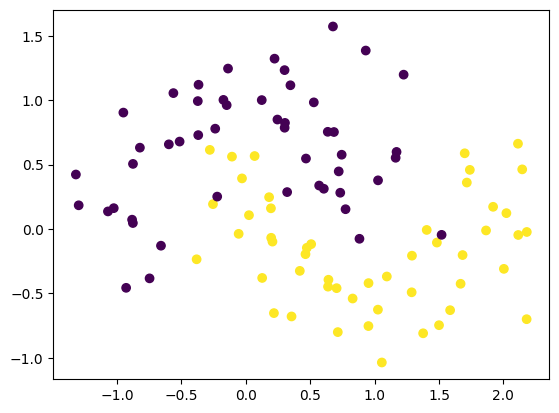

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

In [ ]:
model = Sequential()

model.add(Dense(10, activation='tanh', input_dim=2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.22934797, -0.18055725,  0.28520167,  0.04819393, -0.03896022,
         -0.69793934,  0.04012835, -0.67438865,  0.5009133 ,  0.39127797],
        [ 0.58295745,  0.09402961, -0.35525241,  0.4031245 ,  0.57426864,
         -0.57708794, -0.43370354, -0.526065  , -0.33469418, -0.48703986]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.08523548,  0.26898527, -0.1377843 ,  0.37847632,  0.36711365,
         -0.20021963, -0.02363157,  0.5103297 , -0.51641065,  0.10308206],
        [-0.23741022, -0.23596355,  0.5013764 , -0.09439301,  0.27436316,
          0.52726376,  0.41358483,  0.5235286 , -0.4563939 ,  0.19662952],
        [ 0.11672956,  0.4195004 ,  0.23646492,  0.23478317, -0.53202075,
         -0.01505554,  0.12717724,  0.03004944, -0.02444112,  0.06704807],
        [ 0.13890147, -0.47108328,  0.15519929,  0.51320624,  0.18026495,
          0.3025726 ,  0.15424508,  0.08256602, -0.07110593, -0.13325527],
        [-0.06583

In [ ]:
initial_weights = model.get_weights()

In [ ]:
for i in range(len(initial_weights)):
    if i==0:
        initial_weights[i] = np.random.randn(2,10)*np.sqrt(1/2)
    elif i==8:
        initial_weights[i] = np.random.randn(10,1)*np.sqrt(1/10)
    elif i%2==0:
        initial_weights[i] = np.random.randn(10,10)*np.sqrt(1/10)
    else:
        initial_weights[i] = np.zeros(initial_weights[i].shape)

In [ ]:
initial_weights

[array([[-0.05149324, -0.74666794, -0.8572822 , -0.33034941,  0.05727969,
         -0.18144877,  0.93706667, -0.58793187, -0.07323668, -0.05091689],
        [-0.14340746,  0.3021504 , -0.57600548,  0.30303271,  0.79485417,
         -0.11265961, -0.36092833,  0.65935822,  0.74484986,  0.90668816]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[ 0.68141904,  0.13963853, -0.00310688,  0.09452131, -0.03762549,
         -0.14850893, -0.18570155,  0.35290755, -0.25142926, -0.04432668],
        [ 0.17690666, -0.16899378, -0.38852128, -0.16284246, -0.21452212,
          0.2568566 , -0.04801929, -0.43300934, -0.206484  , -0.19587332],
        [ 0.09350403, -0.02414991,  0.38720183,  0.17966058, -0.03331665,
          0.52904775, -0.42851773,  0.08865922, -0.56260906, -0.02458364],
        [-0.09830845, -0.42864897,  0.11355225, -0.57716292,  0.01115157,
         -0.23420142,  0.2066984 , -0.11930593,  0.50357316,  0.47827882],
        [-0.16038726, -0.06379103, -0.55622354,  0.298

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[-0.05149323, -0.7466679 , -0.8572822 , -0.33034942,  0.05727969,
         -0.18144877,  0.9370667 , -0.5879319 , -0.07323668, -0.05091689],
        [-0.14340746,  0.3021504 , -0.57600546,  0.3030327 ,  0.79485416,
         -0.1126596 , -0.36092833,  0.6593582 ,  0.74484986,  0.90668815]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.681419  ,  0.13963853, -0.00310688,  0.09452131, -0.03762548,
         -0.14850894, -0.18570155,  0.35290754, -0.25142926, -0.04432668],
        [ 0.17690666, -0.16899377, -0.38852128, -0.16284247, -0.21452212,
          0.2568566 , -0.04801929, -0.43300936, -0.206484  , -0.19587332],
        [ 0.09350403, -0.02414991,  0.38720185,  0.17966057, -0.03331665,
          0.5290477 , -0.42851773,  0.08865922, -0.5626091 , -0.02458364],
        [-0.09830844, -0.42864898,  0.11355225, -0.5771629 ,  0.01115157,
         -0.23420142,  0.2066984 , -0.11930593,  0.5035732 ,  0.47827882],
        [-0.16038

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.7183 - loss: 0.6180 - val_accuracy: 0.8500 - val_loss: 0.5715
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7294 - loss: 0.6143 - val_accuracy: 0.8500 - val_loss: 0.5589
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7147 - loss: 0.6047 - val_accuracy: 0.8500 - val_loss: 0.5464
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7987 - loss: 0.5901 - val_accuracy: 0.8500 - val_loss: 0.5340
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7884 - loss: 0.5758 - val_accuracy: 0.8500 - val_loss: 0.5220
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7987 - loss: 0.5636 - val_accuracy: 0.8500 - val_loss: 0.5101
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7908 - loss: 0.5529 - val_accuracy: 0.8500 - val_loss: 0.4981
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7674 - loss: 0.5576 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

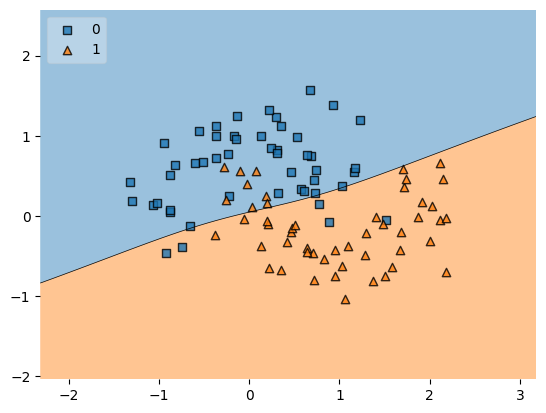

In [ ]:
plot_decision_regions(X.to_numpy(), y.to_numpy().astype('int'), clf = model, legend=2)

### Kernel_initializer (he - ReLU, glorot/xavier - tanh/sigmoid)

In [ ]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.38299215,  0.10440409, -1.6734961 , -0.54850984, -1.3190019 ,
          1.6100794 , -0.6317179 , -0.15347528,  0.432171  ,  0.83739865],
        [ 0.34308422,  0.13765872,  0.9939784 ,  0.4367    ,  0.36659205,
         -0.26094544, -1.6687558 ,  0.54181516, -1.6913394 , -1.3341804 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.33334586,  0.5950535 , -0.2588729 ,  0.79515725, -0.15208016,
          0.8158401 ,  0.04574449, -0.06207498,  0.12019934, -0.8539047 ],
        [-0.58220536,  0.16943601, -0.10339407, -0.37464944, -0.11558332,
         -0.36711985, -0.66371876, -0.46853217, -0.28204057,  0.24158183],
        [ 0.8043145 , -0.49333194, -0.09763405,  0.7966756 ,  0.16288652,
          0.6240558 ,  0.98635274,  0.11680967, -0.48338872,  0.30526435],
        [-0.07943329, -0.11065032,  0.7093855 , -0.35249668, -0.40454483,
         -0.36684954, -0.49667683,  0.15958193, -0.48857877,  0.78529924],
        [ 0.37570

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.3735 - loss: 0.6961 - val_accuracy: 0.4000 - val_loss: 0.6300
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3813 - loss: 0.6699 - val_accuracy: 0.5500 - val_loss: 0.6071
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6022 - loss: 0.6466 - val_accuracy: 0.7500 - val_loss: 0.5856
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6801 - loss: 0.6364 - val_accuracy: 0.7500 - val_loss: 0.5662
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7514 - loss: 0.6138 - val_accuracy: 0.8000 - val_loss: 0.5479
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7358 - loss: 0.5983 - val_accuracy: 0.8000 - val_loss: 0.5311
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7436 - loss: 0.5846 - val_accuracy: 0.8000 - val_loss: 0.5154
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7006 - loss: 0.5878 - val_accuracy: 0.8000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

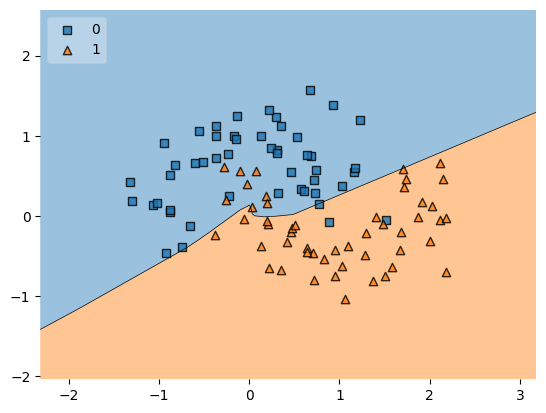

In [ ]:
plot_decision_regions(X.to_numpy(), y.to_numpy().astype('int'), clf = model, legend=2)